Домашнее задание numpy 
список вариантов по фамилиям: 

Андрей Овсянов - 14 вариант 

<h1> Задание 1 </h1>
На маркетплейсе есть огромный объем данных содержащий записи о продажах различных продуктов. Наша цель — рассчитать общий доход, полученный от каждого продукта за определённый период.

Необходимо решить задачу через классический python, numpy и numpy с использованием векторизации

Данные: products = ['автомобиль HAVAL', 'обувь', 'одежда', 'телефоны'] (при решении через numpy необходимо представить это в виде np.array() ) prices = [20000, 3000, 45600, 5000] (при решении через numpy необходимо представить это в виде np.array() )

Данные о продажах необходимо сгенерировать самостоятельно и вывести в одном параграфов в ноутбуке, ниже приведен пример генерации случайных значений

In [38]:
# пример генерации на python

import random
import numpy

variant = 14 # подставьте номер своего  варианта
sales_list = [[random.randint(0, variant+100) for i in range(100000)] for i in range(4)]
products = ['автомобиль HAVAL', 'обувь', 'одежда', 'телефоны']
prices = [20000.0, 3000.0, 45600.0, 5000.0]

import timeit 


print("Чистый питон")
start = timeit.default_timer()
for i, product in enumerate(products):
    product_sales = [prices[i] * sale for sale in sales_list[i]]
    print(" Общая выручка с продажи товара: {} = {}".format(product, sum(product_sales)))

print(" Время выполнения: {} sec.".format(round(timeit.default_timer() - start, 3)))

sales_list = np.array(sales_list)
products = np.array(products)
prices = np.array(prices, dtype=float)


print("С использованием numpy")
start = timeit.default_timer()
for i, product in enumerate(products):
    product_sales = [prices[i] * sale for sale in sales_list[i]] # Произведение вектора на массив
    print(" Общая выручка с продажи товара: {} = {}".format(product, sum(product_sales)))

print(" Время выполнения: {} sec.".format(round(timeit.default_timer() - start, 3)))


print("С использованием numpy-векторизации")
start = timeit.default_timer()

for i, product in enumerate(products):
    product_sales = sales_list[i] * prices[i]
    print(" Общая выручка с продажи товара: {} = {}".format(product, sum(product_sales)))

print(" Время выполнения: {} sec.".format(round(timeit.default_timer() - start, 3)))

Чистый питон
 Общая выручка с продажи товара: автомобиль HAVAL = 113988180000.0
 Общая выручка с продажи товара: обувь = 17094516000.0
 Общая выручка с продажи товара: одежда = 259871071200.0
 Общая выручка с продажи товара: телефоны = 28497830000.0
 Время выполнения: 0.036 sec.
С использованием numpy
 Общая выручка с продажи товара: автомобиль HAVAL = 113988180000.0
 Общая выручка с продажи товара: обувь = 17094516000.0
 Общая выручка с продажи товара: одежда = 259871071200.0
 Общая выручка с продажи товара: телефоны = 28497830000.0
 Время выполнения: 0.158 sec.
С использованием numpy-векторизации
 Общая выручка с продажи товара: автомобиль HAVAL = 113988180000.0
 Общая выручка с продажи товара: обувь = 17094516000.0
 Общая выручка с продажи товара: одежда = 259871071200.0
 Общая выручка с продажи товара: телефоны = 28497830000.0
 Время выполнения: 0.032 sec.


# Задание 2


Необходимо написать с использованием numpy реализацию одного из следующих алгоритмов:

heapsort (вариант: 1,5,9,13,17,21)

mergesort (вариант: 2,6,10,14,18,22)

stable (вариант: 3,7,11,15,19)

quicksort (вариант: 4,8,12,16,20)

Сравнить скорость выполнения этих алгоритмов на чистом python, вашей реализации и numpy.sort()

Моему варианту ( 14 ) соответствует mergesort, напишем алгоритм с использованием numpy.array

In [34]:
import numpy as np

def merge(left, right):
    result = np.array([])

    while left.size > 0 and right.size > 0:
        if left[0] < right[0]:
            result = np.append(result, left[0])
            left = left[1:]
        else:
            result = np.append(result, right[0])
            right = right[1:]

    result = np.append(result, left)
    result = np.append(result, right)
    
    return result

def merge_sort(arr):
    if arr.size <= 1:
        return arr

    middle = arr.size // 2
    left = arr[:middle]
    right = arr[middle:]

    left = merge_sort(left)
    right = merge_sort(right)

    return merge(left, right)


arr = np.array([random.randint(-variant*100, variant*100) for i in range(100000)])
print("Сортировка на чистом python")
%timeit sorted(arr)
print("Сортировка реализацией mergesort с использованием numpy")
%timeit merge_sort(arr)
print("Сортировка использованием встроенной функции numpy.sort()")
%timeit np.sort(arr)


Сортировка на чистом python
41.9 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Сортировка реализацией mergesort с использованием numpy
12 s ± 989 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Сортировка использованием встроенной функции numpy.sort()
4.77 ms ± 223 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


На массивах большей длины эффективней всего отрабатывает numpy.sort()

<h1>Задание №3</h1>

In [35]:
# Загрузка данных из CSV-файла
data_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv"
data = np.genfromtxt(data_url, delimiter=',', dtype=None, names=True, encoding=None)

# Вывести названия столбцов

for i, column_name in enumerate(data.dtype.names[1:]):
    record = data[np.argmax(data[column_name])]
    print("Страна с наибольшим потреблением {}: {}".format(column_name, record[0]))
    print("Количество потребляемого алкоголя: {}".format(record[i+1]))

Страна с наибольшим потреблением beer_servings: Namibia
Количество потребляемого алкоголя: 376
Страна с наибольшим потреблением spirit_servings: Grenada
Количество потребляемого алкоголя: 438
Страна с наибольшим потреблением wine_servings: France
Количество потребляемого алкоголя: 370
Страна с наибольшим потреблением total_litres_of_pure_alcohol: Belarus
Количество потребляемого алкоголя: 14.4


<h1>Задание №4</h1>

У нас есть Полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Давайте представим эти данные в виде структурированных массивов и определим:

- число проклятий, летальных исходов и их отношение по фильмам 

- частота употребления конкретных прокрятий 

- распределение времени между проклятиями 

In [81]:
# Загрузка данных из CSV-файла
data_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/tarantino/tarantino.csv"
data = np.genfromtxt(data_url, delimiter=',', dtype=None, names=True, encoding=None)

- число проклятий, летальных исходов и их отношение по фильмам 

In [82]:
movies = np.unique(data['movie'])

film_stats = np.zeros((len(movies), 4)) # cursing, lethal, other, lethal_ratio

movies = np.unique(data['movie'])
film_stats = np.zeros((len(movies), 4))

for i, movie in enumerate(movies):
    current_movie = data[data['movie'] == movie]
    curse = len(current_movie[current_movie['type'] == 'word'])
    death = len(current_movie[current_movie['type'] == 'death'])
    film_stats[i] = [curse, death, 0, 0]

In [83]:
total_sum_curse = np.sum(film_stats[:, 0])
total_sum_death = np.sum(film_stats[:, 1])

film_stats[:, 2] = film_stats[:, 0] / total_sum_curse
film_stats[:, 3] = film_stats[:, 1] / total_sum_death

np.set_printoptions(suppress=True)
film_stats = np.round(film_stats, 2)

In [97]:
for pos in range(len(movies)):
    film_stat = film_stats[pos]
    print("Фильм: {}".format(movies[pos]))
    print(" Количество проклятий: {} и их отношение к общему количеству: {}".format(int(film_stat[0]), film_stat[2]))
    print(" Количество смертей: {} и их отношение к общему количеству: {}".format(int(film_stat[1]), film_stat[3]))
    print(" Отношение смертей к проклятиям: {}/{} = {}".format(film_stat[1], film_stat[0], round(film_stat[1] / film_stat[0], 2)))

Фильм: Django Unchained
 Количество проклятий: 262 и их отношение к общему количеству: 0.15
 Количество смертей: 47 и их отношение к общему количеству: 0.25
 Отношение смертей к проклятиям: 47.0/262.0 = 0.18
Фильм: Inglorious Basterds
 Количество проклятий: 58 и их отношение к общему количеству: 0.03
 Количество смертей: 48 и их отношение к общему количеству: 0.25
 Отношение смертей к проклятиям: 48.0/58.0 = 0.83
Фильм: Jackie Brown
 Количество проклятий: 368 и их отношение к общему количеству: 0.22
 Количество смертей: 4 и их отношение к общему количеству: 0.02
 Отношение смертей к проклятиям: 4.0/368.0 = 0.01
Фильм: Kill Bill: Vol. 1
 Количество проклятий: 57 и их отношение к общему количеству: 0.03
 Количество смертей: 63 и их отношение к общему количеству: 0.33
 Отношение смертей к проклятиям: 63.0/57.0 = 1.11
Фильм: Kill Bill: Vol. 2
 Количество проклятий: 69 и их отношение к общему количеству: 0.04
 Количество смертей: 11 и их отношение к общему количеству: 0.06
 Отношение смерте

- частота употребления конкретных проклятий 

In [86]:
from collections import Counter

curse = data['word']

curse_counts = Counter(curse)
curse_counts.pop('') # Удаляем смерти
curse_counts

Counter({'fucking': 407,
         'shit': 221,
         'fuck': 213,
         'n-word ': 179,
         'ass': 140,
         'goddamn': 113,
         'motherfucker': 70,
         'bitch': 64,
         'hell': 45,
         'damn': 37,
         'motherfucking': 27,
         'fucked': 25,
         'bullshit': 15,
         'motherfuckers': 15,
         'dick': 14,
         'pussy': 11,
         'bastard': 10,
         'asshole': 10,
         'bitches': 9,
         'fucker': 8,
         'dicks': 5,
         'assholes': 5,
         'negro ': 5,
         'asses': 4,
         'shitty': 4,
         'fucks': 3,
         'damned': 3,
         'shithead': 3,
         'wetback': 2,
         'cocksucker': 2,
         'gooks': 2,
         'cunt': 2,
         'japs': 2,
         'horseshit': 2,
         'shitload': 2,
         'jap': 1,
         'fuckup': 1,
         'asshead': 1,
         'faggot': 1,
         'gook': 1,
         'fuckers': 1,
         'dickless': 1,
         'chickenshit': 1,
       

- распределение времени между проклятиями

In [98]:
data_without_death = data[data['type'] == 'word']
time_between_cursing = data_without_death['minutes_in']

time_diff = np.diff(time_between_cursing)

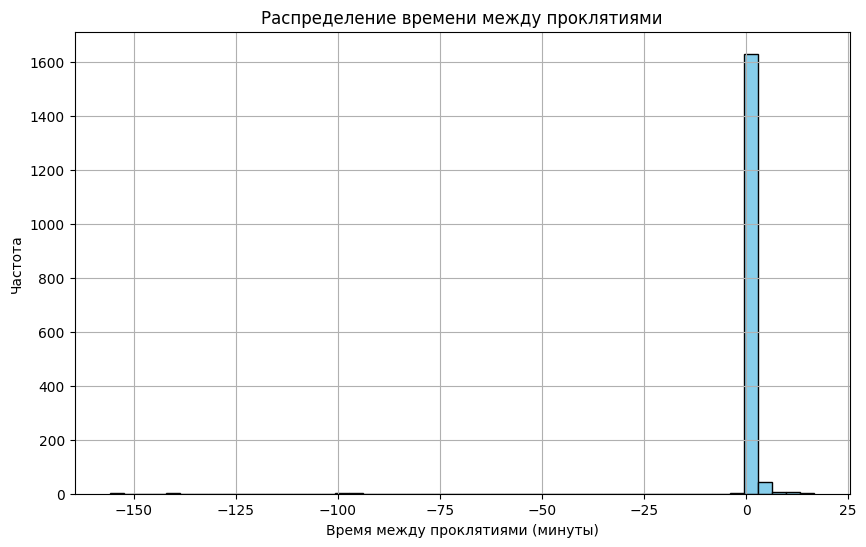

In [99]:
import matplotlib.pyplot as plt

# Создаем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(time_diff, bins=50, color='skyblue', edgecolor='black')
plt.title("Распределение времени между проклятиями")
plt.xlabel("Время между проклятиями (минуты)")
plt.ylabel("Частота")
plt.grid(True)

# Отобразим гистограмму
plt.show()